In [35]:
import plotly.express as px
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_excel('./dataset/RSW-dataset.xlsx')

In [3]:
df.head()

,NUGGET.WIDTH.1,MATERIAL.1,THICKNESS.1,COATING.EG.1,COATING.HDG.1,COATING.WEIGHT.1,SURFACE.CLASS.1,MATERIAL.2,THICKNESS.2,COATING.EG.2,COATING.HDG.2,COATING.WEIGHT.2,SURFACE.CLASS.2,WELD.FORCE,WELD.CURRENT,WELD.TIME
0,3.6,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.3,720.0
1,4.4,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.3,720.0
2,4.6,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.3,720.0
3,4.1,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.6,720.0
4,5.1,Material_E,0.8,0,0,0,3,Material_E,0.8,0,0,0,3,674,7.6,720.0


In [4]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [5]:
print('train_df.shape:', train_df.shape)
print('test_df.shape:', test_df.shape)

train_df.shape: (900, 16)
test_df.shape: (226, 16)


In [6]:
input_cols = list(train_df.columns)[1:]
target_col = 'NUGGET.WIDTH.1'

In [9]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [10]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [11]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [12]:
train_inputs[numeric_cols].describe()

,THICKNESS.1,COATING.EG.1,COATING.HDG.1,COATING.WEIGHT.1,SURFACE.CLASS.1,THICKNESS.2,COATING.EG.2,COATING.HDG.2,COATING.WEIGHT.2,SURFACE.CLASS.2,WELD.FORCE,WELD.CURRENT,WELD.TIME
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.0,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,1.197944,0.008889,0.567778,40.195556,1.864444,1.348167,0.0,0.567778,40.195556,1.864444,884.811111,7.960633,357.078822
std,0.161210,0.093913,0.495660,36.312045,0.991321,0.315293,0.0,0.495660,36.312045,0.991321,123.369869,1.738287,161.560156
min,0.800000,0.000000,0.000000,0.000000,1.000000,0.800000,0.0,0.000000,0.000000,1.000000,499.000000,4.200000,166.700000
25%,1.200000,0.000000,0.000000,0.000000,1.000000,1.200000,0.0,0.000000,0.000000,1.000000,899.000000,6.700000,250.050000
50%,1.200000,0.000000,1.000000,60.000000,1.000000,1.200000,0.0,1.000000,60.000000,1.000000,910.000000,8.100000,300.060000
75%,1.200000,0.000000,1.000000,70.000000,3.000000,1.400000,0.0,1.000000,70.000000,3.000000,910.000000,9.100000,400.000000
max,1.500000,1.000000,1.000000,94.000000,3.000000,2.000000,0.0,1.000000,94.000000,3.000000,1124.000000,13.500000,800.000000


In [13]:
train_inputs[categorical_cols].nunique()

MATERIAL.1    5
MATERIAL.2    5
dtype: int64

In [14]:
df[categorical_cols].nunique()

MATERIAL.1    5
MATERIAL.2    5
dtype: int64

In [15]:
train_inputs.describe().loc[['min', 'max']]

,THICKNESS.1,COATING.EG.1,COATING.HDG.1,COATING.WEIGHT.1,SURFACE.CLASS.1,THICKNESS.2,COATING.EG.2,COATING.HDG.2,COATING.WEIGHT.2,SURFACE.CLASS.2,WELD.FORCE,WELD.CURRENT,WELD.TIME
min,0.8,0.0,0.0,0.0,1.0,0.8,0.0,0.0,0.0,1.0,499.0,4.2,166.7
max,1.5,1.0,1.0,94.0,3.0,2.0,0.0,1.0,94.0,3.0,1124.0,13.5,800.0


In [18]:
scaler = MinMaxScaler().fit(df[numeric_cols])

In [19]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [20]:
train_inputs.describe().loc[['min', 'max']]

,THICKNESS.1,COATING.EG.1,COATING.HDG.1,COATING.WEIGHT.1,SURFACE.CLASS.1,THICKNESS.2,COATING.EG.2,COATING.HDG.2,COATING.WEIGHT.2,SURFACE.CLASS.2,WELD.FORCE,WELD.CURRENT,WELD.TIME
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [21]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [22]:
encoder.fit(df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [23]:
encoder.categories_

[array(['Material_A', 'Material_B', 'Material_C', 'Material_D',
        'Material_E'], dtype=object),
 array(['Material_A', 'Material_B', 'Material_C', 'Material_D',
        'Material_E'], dtype=object)]

In [24]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['MATERIAL.1_Material_A', 'MATERIAL.1_Material_B', 'MATERIAL.1_Material_C', 'MATERIAL.1_Material_D', 'MATERIAL.1_Material_E', 'MATERIAL.2_Material_A', 'MATERIAL.2_Material_B', 'MATERIAL.2_Material_C', 'MATERIAL.2_Material_D', 'MATERIAL.2_Material_E']


In [25]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [26]:
train_inputs

,MATERIAL.1,THICKNESS.1,COATING.EG.1,COATING.HDG.1,COATING.WEIGHT.1,SURFACE.CLASS.1,MATERIAL.2,THICKNESS.2,COATING.EG.2,COATING.HDG.2,...,MATERIAL.1_Material_A,MATERIAL.1_Material_B,MATERIAL.1_Material_C,MATERIAL.1_Material_D,MATERIAL.1_Material_E,MATERIAL.2_Material_A,MATERIAL.2_Material_B,MATERIAL.2_Material_C,MATERIAL.2_Material_D,MATERIAL.2_Material_E
875,Material_C,0.571429,0.0,0.0,0.000000,1.0,Material_C,0.333333,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
712,Material_C,0.571429,0.0,0.0,0.000000,1.0,Material_C,1.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
554,Material_C,0.571429,0.0,0.0,0.000000,1.0,Material_C,1.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
688,Material_C,0.571429,0.0,0.0,0.000000,1.0,Material_C,1.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
780,Material_C,0.571429,0.0,0.0,0.000000,1.0,Material_C,0.333333,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Material_B,0.571429,0.0,1.0,0.744681,0.0,Material_B,0.333333,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
121,Material_A,0.857143,0.0,1.0,0.744681,0.0,Material_A,0.500000,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1044,Material_D,0.571429,0.0,1.0,1.000000,0.0,Material_D,0.333333,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1095,Material_D,0.571429,0.0,1.0,1.000000,0.0,Material_D,0.333333,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
test_inputs

,MATERIAL.1,THICKNESS.1,COATING.EG.1,COATING.HDG.1,COATING.WEIGHT.1,SURFACE.CLASS.1,MATERIAL.2,THICKNESS.2,COATING.EG.2,COATING.HDG.2,...,MATERIAL.1_Material_A,MATERIAL.1_Material_B,MATERIAL.1_Material_C,MATERIAL.1_Material_D,MATERIAL.1_Material_E,MATERIAL.2_Material_A,MATERIAL.2_Material_B,MATERIAL.2_Material_C,MATERIAL.2_Material_D,MATERIAL.2_Material_E
1090,Material_D,0.571429,0.0,1.0,1.000000,0.0,Material_D,0.333333,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1083,Material_D,0.571429,0.0,1.0,1.000000,0.0,Material_D,0.333333,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
739,Material_C,0.571429,0.0,0.0,0.000000,1.0,Material_C,0.333333,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
140,Material_A,0.857143,0.0,1.0,0.744681,0.0,Material_A,0.500000,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1018,Material_D,0.571429,0.0,1.0,0.744681,0.0,Material_D,0.333333,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,Material_B,0.000000,1.0,1.0,0.531915,0.0,Material_B,0.000000,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
429,Material_B,0.571429,0.0,1.0,0.744681,0.0,Material_B,0.333333,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12,Material_E,0.000000,0.0,0.0,0.000000,1.0,Material_E,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1035,Material_D,0.571429,0.0,1.0,1.000000,0.0,Material_D,0.333333,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (900, 25)
train_targets: (900,)
test_inputs: (226, 25)
test_targets: (226,)


In [29]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [30]:
def evalute(targets, predictions,  name=''):
    mae = mean_absolute_error(targets, predictions)
    mse = mean_squared_error(targets, predictions)
    mape = mean_absolute_percentage_error(targets, predictions)
    print(name)
    print("mae:", mae)
    print("mse:", mse)
    print("mape:", mape)

# Linear regression 


In [31]:
lr_model = LinearRegression()
lr_model.fit(X_train, train_targets)

LinearRegression()

In [32]:
train_preds = lr_model.predict(X_train)
evalute(train_targets, train_preds, "Training")

Training
mae: 1.3636699000091195
mse: 2.9151529558501537
mape: 2354187038189624.0


In [33]:
test_preds = lr_model.predict(X_test)
evalute(test_targets, test_preds, "Testing")

Testing
mae: 1.2323923886142794
mse: 2.493733735880024
mape: 1918436922596305.0


polynomial


In [36]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [38]:
lr_model = LinearRegression()
lr_model.fit(X_train_poly, train_targets)

LinearRegression()

In [39]:
train_preds = lr_model.predict(X_train_poly)
evalute(train_targets, train_preds, "Training")

Training
mae: 1.214241469870419
mse: 2.5847436231379026
mape: 2182619732836974.2


In [40]:
test_preds = lr_model.predict(X_test_poly)
evalute(test_targets, test_preds, "Testing")

Testing
mae: 1.1479336978419357
mse: 2.3501428266507904
mape: 1735764058642799.2


# Random Forest


In [43]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, train_targets)

RandomForestRegressor()

In [44]:
train_preds = rf_model.predict(X_train)
evalute(train_targets, train_preds, "Training")

Training
mae: 0.8268029500922243
mse: 1.561648496198618
mape: 1520628776246641.8


In [45]:
test_preds = rf_model.predict(X_test)
evalute(test_targets, test_preds, "Testing")

Testing
mae: 1.3550129974253864
mse: 4.127235389915557
mape: 2106036334399375.0


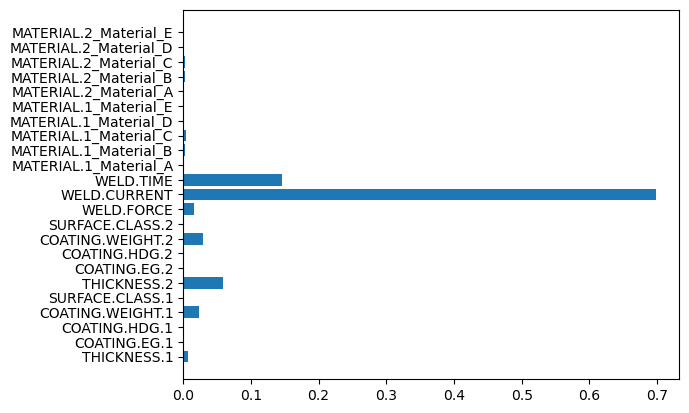

In [46]:

plt.barh(X_train.columns, rf_model.feature_importances_)
plt.show()
